In [124]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import random
from keras.preprocessing.image import load_img
from tqdm.notebook import tqdm
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

In [125]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [126]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [128]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)


train = train.sample(frac=1).reset_index(drop=True)
train.head()

fear Completed
neutral Completed
.ipynb_checkpoints Completed
happy Completed
angry Completed
sad Completed
disgust Completed
surprise Completed


,image,label
0,train/neutral/Training_86041890.jpg,neutral
1,train/happy/Training_95948303.jpg,happy
2,train/angry/Training_94274064.jpg,angry
3,train/sad/Training_86330351.jpg,sad
4,train/neutral/Training_94828316.jpg,neutral


In [129]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

fear Completed
neutral Completed
.ipynb_checkpoints Completed
happy Completed
angry Completed
sad Completed
disgust Completed
surprise Completed


,image,label
0,test/fear/PublicTest_58756471.jpg,fear
1,test/fear/PublicTest_86240938.jpg,fear
2,test/fear/PrivateTest_43551877.jpg,fear
3,test/fear/PublicTest_51379102.jpg,fear
4,test/fear/PublicTest_70080254.jpg,fear


<Axes: xlabel='count', ylabel='label'>

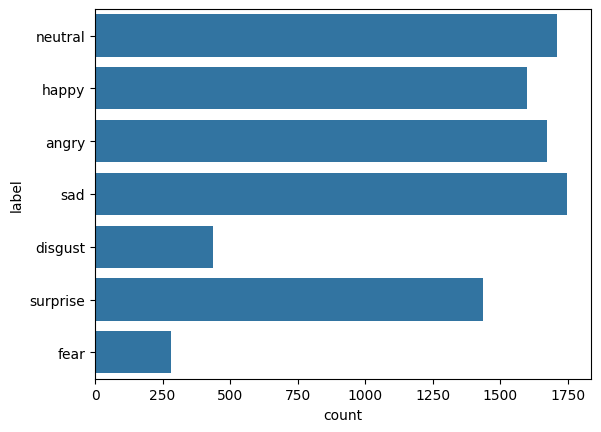

In [130]:
sns.countplot(train['label'])

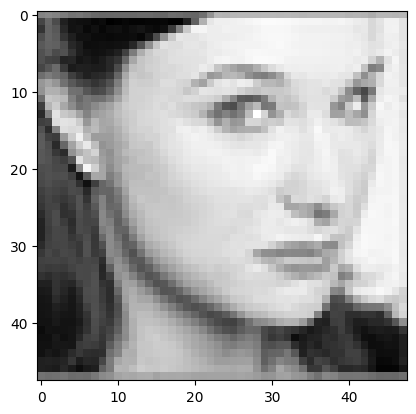

In [131]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

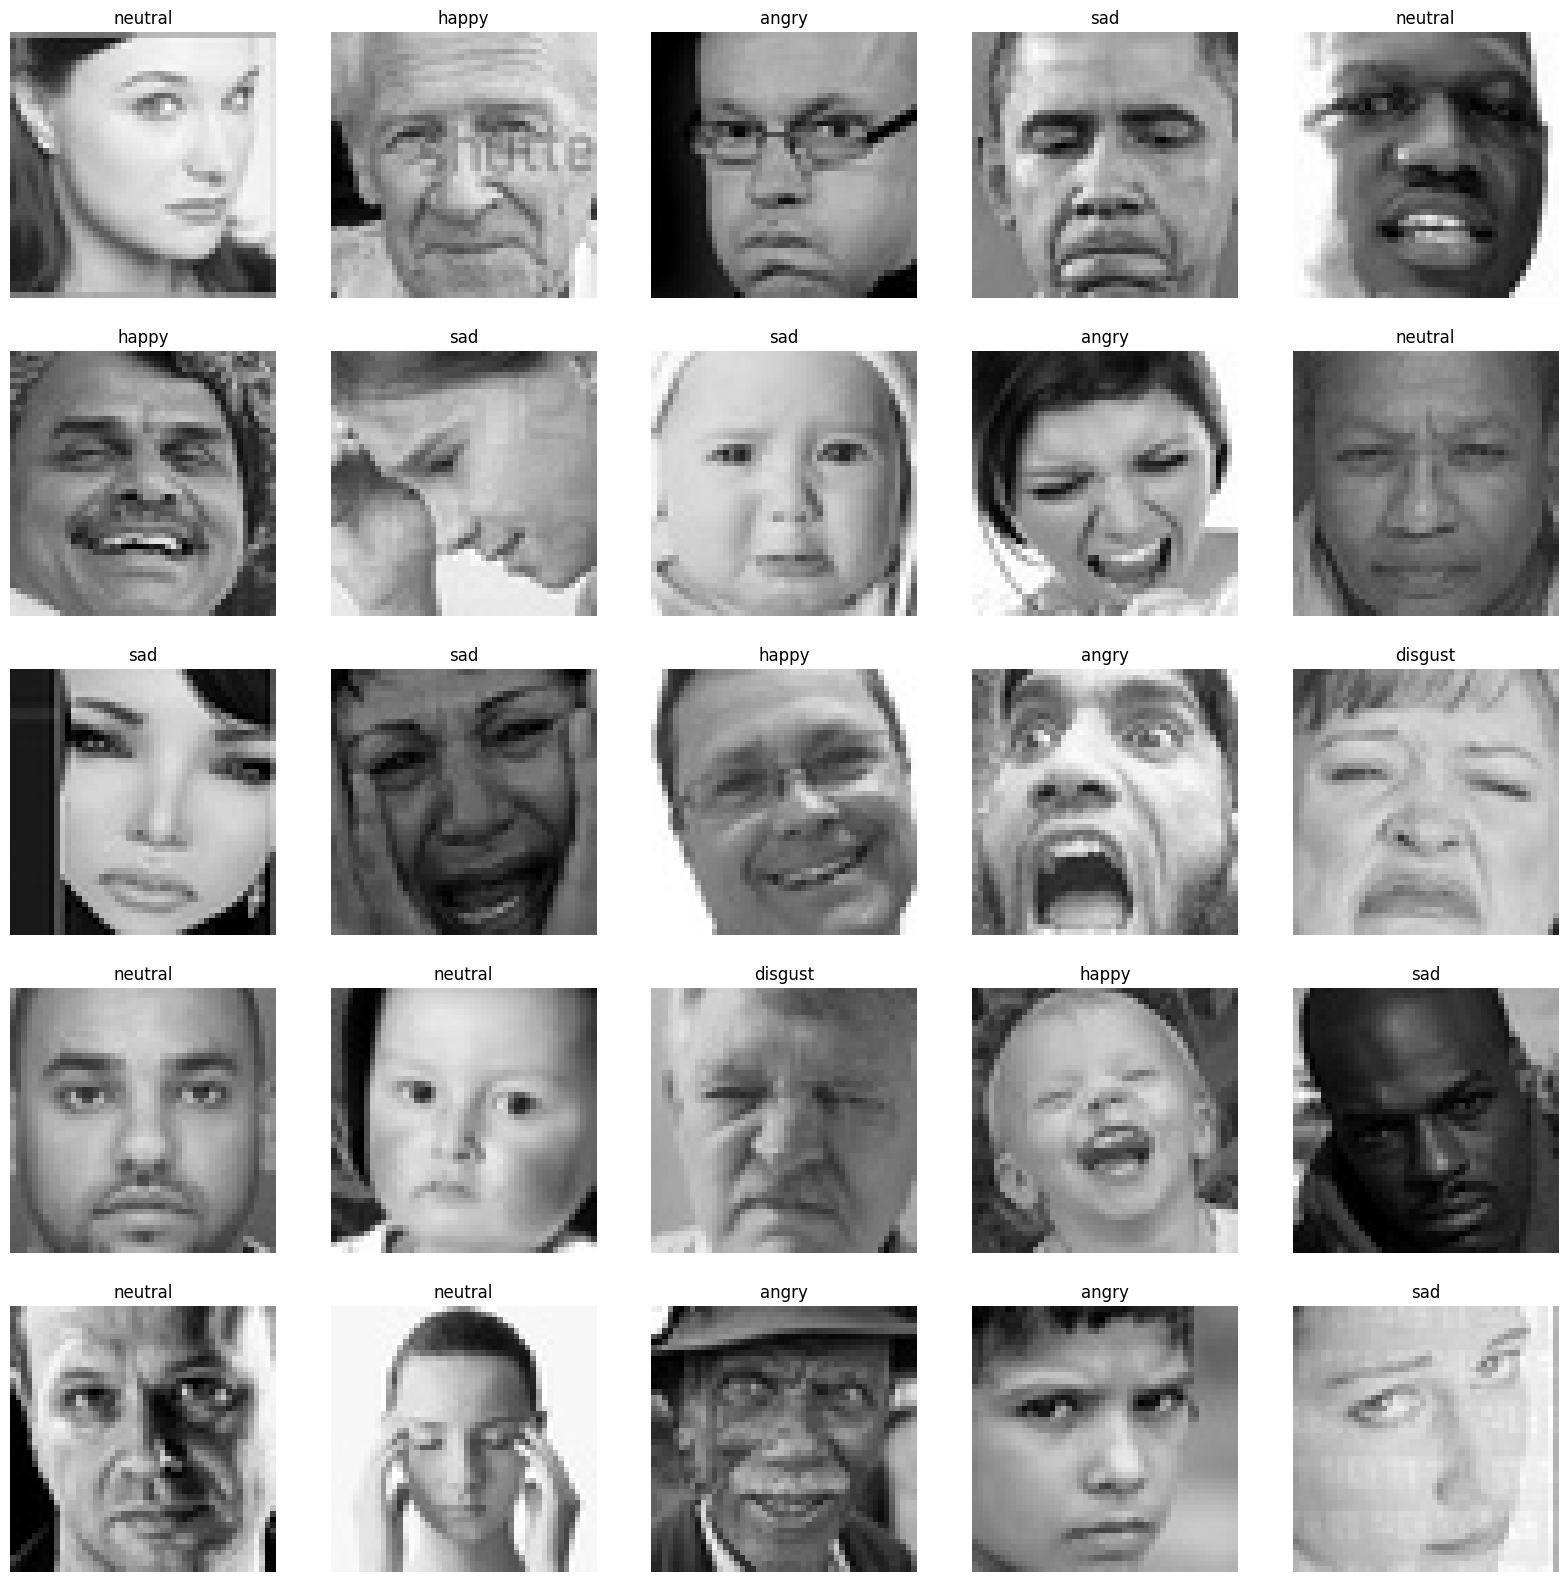

In [132]:

plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [133]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [134]:
train_features = extract_features(train['image'])

  0%|          | 0/8880 [00:00<?, ?it/s]

In [135]:
test_features = extract_features(test['image'])

  0%|          | 0/4246 [00:00<?, ?it/s]

In [136]:

x_train = train_features/255.0
x_test = test_features/255.0

In [137]:
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [138]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [140]:
input_shape = (48, 48, 1)
output_class = 7

In [147]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='gelu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='gelu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='gelu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='gelu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='gelu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='gelu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [148]:

history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
70/70 [==============================] - 26s 230ms/step - loss: 2.2347 - accuracy: 0.2421 - val_loss: 2.1800 - val_accuracy: 0.2894
Epoch 2/100
70/70 [==============================] - 13s 180ms/step - loss: 1.8284 - accuracy: 0.3331 - val_loss: 2.1324 - val_accuracy: 0.2904
Epoch 3/100
70/70 [==============================] - 13s 180ms/step - loss: 1.6859 - accuracy: 0.3740 - val_loss: 2.3579 - val_accuracy: 0.2904
Epoch 4/100
70/70 [==============================] - 13s 180ms/step - loss: 1.5530 - accuracy: 0.4163 - val_loss: 2.1243 - val_accuracy: 0.2904
Epoch 5/100
70/70 [==============================] - 13s 180ms/step - loss: 1.4354 - accuracy: 0.4595 - val_loss: 2.5401 - val_accuracy: 0.2252
Epoch 6/100
70/70 [==============================] - 13s 179ms/step - loss: 1.3282 - accuracy: 0.5065 - val_loss: 2.1874 - val_accuracy: 0.2845
Epoch 7/100
70/70 [==============================] - 13s 180ms/step - loss: 1.2157 - accuracy: 0.5506 - val_loss: 2.1835 - val_accuracy:

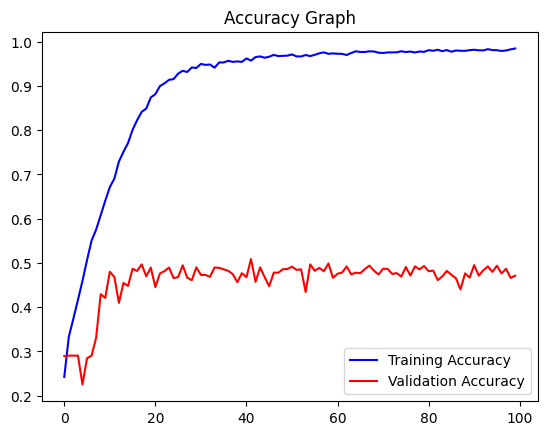

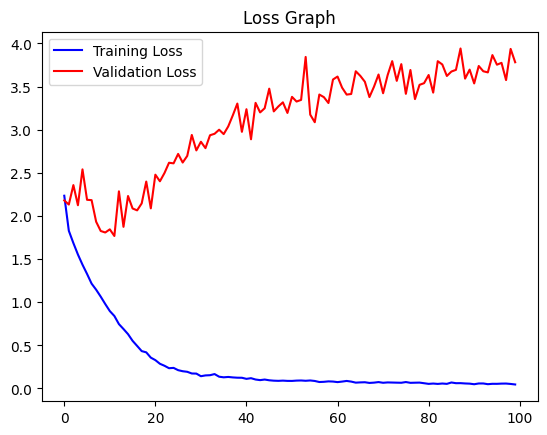

In [149]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: fear


1/1 [==============================] - 0s 358ms/step
Predicted Output: sad


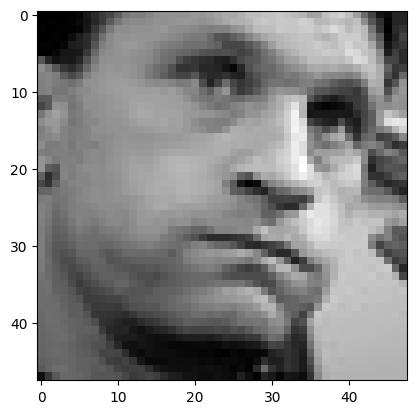

In [150]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: fear
1/1 [==============================] - 0s 21ms/step
Predicted Output: neutral


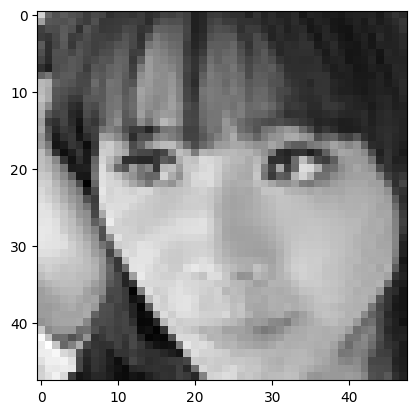